In [342]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import HTML

In [265]:
import warnings
warnings.filterwarnings('ignore')

In [391]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 

In [393]:
%%HTML
<button onclick="$('.input, .prompt, .output_stderr, .output_error, .output_result').toggle();">Toggle Code</button>

# RICKY的MARKOV TRANSITION MATRIX

In [ ]:
"""
https://zhuanlan.zhihu.com/p/138800469
https://www.zhihu.com/question/20123556
https://hudsonthames.org/copula-for-pairs-trading-introduction/
https://www.vosesoftware.com/riskwiki/Archimedeancopulas-theClaytonFrankandGumbel.php
aum sharpe ratio drawdown
"""

# Copula

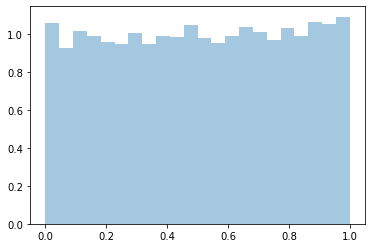

In [266]:
x = stats.uniform(0, 1).rvs(10000)
sns.distplot(x, kde=False, norm_hist=True);

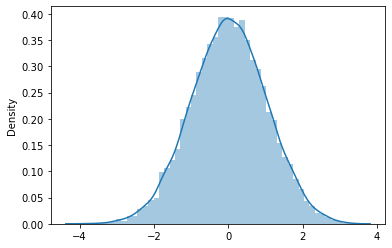

In [267]:
x_trans = stats.norm().ppf(x)
sns.distplot(x_trans);

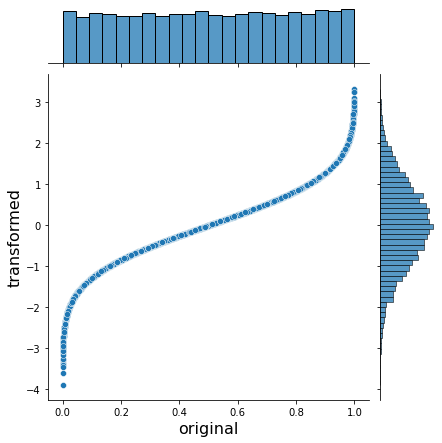

In [268]:
h = sns.jointplot(x, x_trans)
h.set_axis_labels('original', 'transformed', fontsize=16);

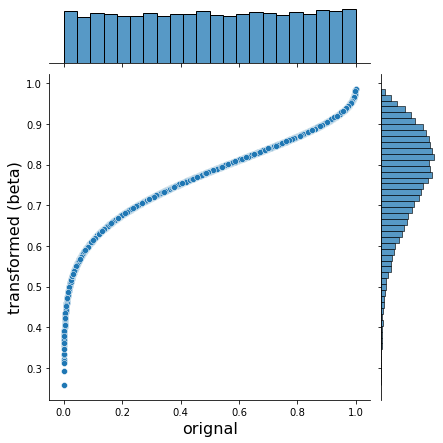

In [269]:
beta = stats.distributions.beta(a=10, b=3)
x_trans = beta.ppf(x)
h = sns.jointplot(x, x_trans)
h.set_axis_labels('orignal', 'transformed (beta)', fontsize=16);
#plt.savefig("joint-beta-x.png",dpi=300) # save fig file

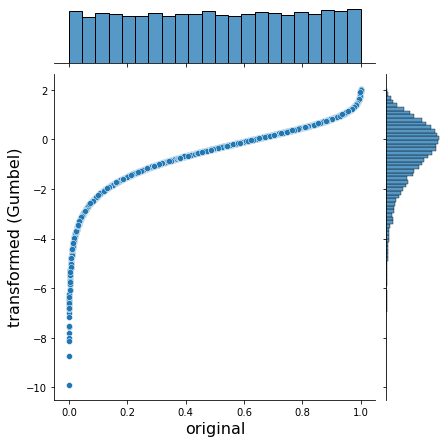

In [270]:
gumbel = stats.distributions.gumbel_l()
x_trans = gumbel.ppf(x)
h = sns.jointplot(x, x_trans)
h.set_axis_labels('original', 'transformed (Gumbel)', fontsize=16);
#plt.savefig("joint-gumbel-x.png",dpi=300) # save fig file

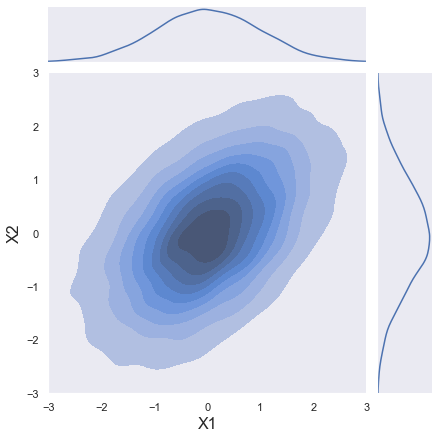

In [421]:
#Gaussian Copula
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], [0.5, 1.]])
# Generate random samples from multivariate normal with correlation .5
x = mvnorm.rvs(10000)
h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', xlim=(-3, 3), ylim=(-3, 3), stat_func=None, shade=True);
h.set_axis_labels('X1', 'X2', fontsize=16);

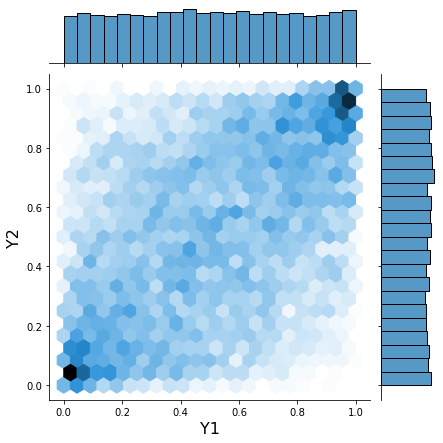

In [272]:
norm = stats.norm()
x_unif = norm.cdf(x)
h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex')
h.set_axis_labels('Y1', 'Y2', fontsize=16);
#plt.savefig("multi-unif-x.png") # save fig file

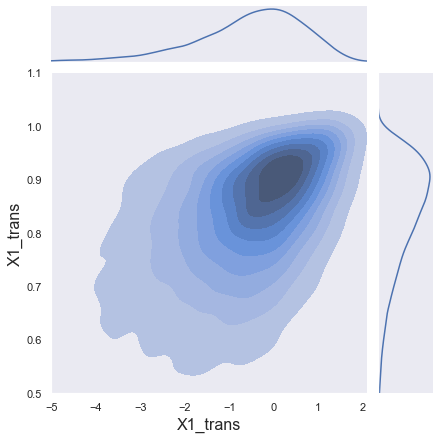

In [422]:
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = m1.ppf(x_unif[:, 0])
x2_trans = m2.ppf(x_unif[:, 1])

h = sns.jointplot(x1_trans, x2_trans, kind='kde', xlim=(-5, 2.1), ylim=(.5, 1.1), stat_func=None, shade=True);
h.set_axis_labels('X1_trans', 'X1_trans', fontsize=16);
#plt.savefig("multi-beta-gumbel-x.png") # save fig file

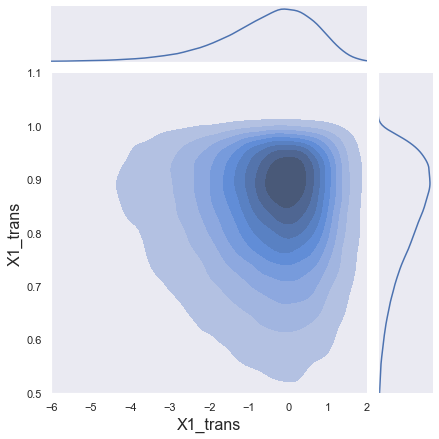

In [419]:
#Without copula
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = m1.ppf(norm.cdf(norm.rvs(100000)))
x2_trans = m2.ppf(norm.cdf(norm.rvs(100000)))

h = sns.jointplot(x1_trans, x2_trans, kind='kde', xlim=(-5, 2.1), ylim=(.5, 1.1), stat_func=None, shade=True);
h.set_axis_labels('X1_trans', 'X1_trans', fontsize=16);

# Data

In [275]:
StockList = ['2330', '2303', '2454']
ColName = ['C_%s' %StockList[i] for i in range(len(StockList))]
#ColName = []
#[ColName.extend(i) for i in zip(['Close_%s' %StockList[i] for i in range(len(StockList))], ['Change_%s' %StockList[i] for i in range(len(StockList))])]


In [423]:
#data: price data || df: log return data
data = pd.concat([pd.read_csv('%s_history.csv' %StockList[i], index_col=0)[['Close']] for i in range(len(StockList))], axis=1)
data.columns = ColName
data = data.iloc[::-1, :]
df = np.log(data.pct_change()+1)
df = df.dropna()

In [424]:
status = lambda x: pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['num','min','min_i','25%',
                    'medium','75%','mean','max','max_i','mean_abs','var','std','skew','kurt'])

df.apply(status)

C_2330       C_2303       C_2454
num              2456         2456         2456
min        -0.0717047    -0.101633    -0.104691
min_i      2013/07/19   2018/11/05   2015/08/03
25%       -0.00809721  -0.00950879   -0.0111733
medium              0            0            0
75%        0.00951312   0.00884962    0.0118744
mean      0.000822724  0.000484715  0.000386601
max         0.0950746    0.0953102    0.0953102
max_i      2020/07/27   2020/07/23   2015/08/28
mean_abs    0.0114216    0.0135287    0.0161232
var       0.000233575  0.000376116  0.000505947
std         0.0152832    0.0193937    0.0224933
skew         0.077238     0.524102   -0.0163125
kurt          2.34304      3.98319      2.71461

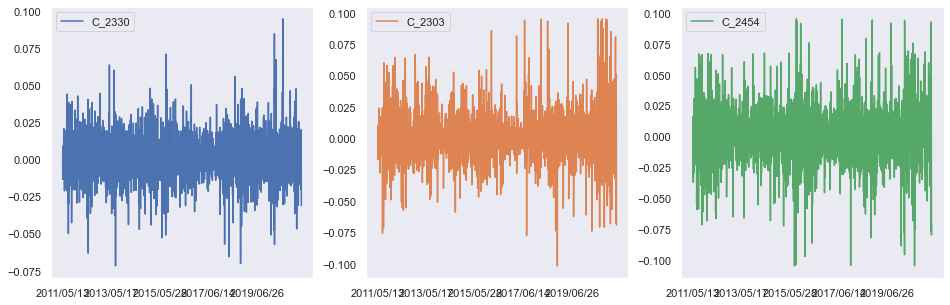

In [425]:
df.plot(subplots=True, layout=(1, 3), figsize=(16, 5), sharex=False);

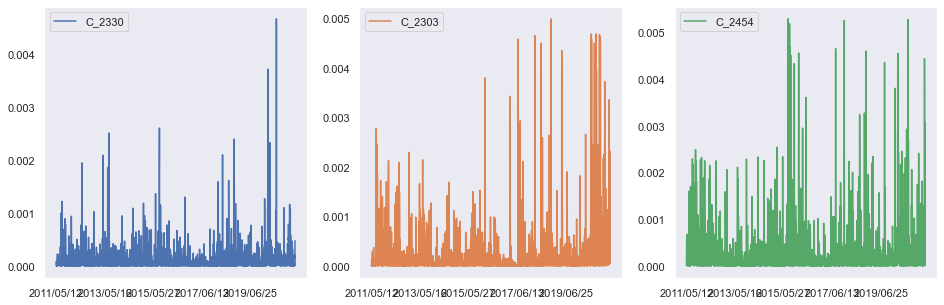

In [426]:
(data.pct_change()-df).plot(subplots=True, layout=(1, 3), figsize=(16, 5), sharex=False);

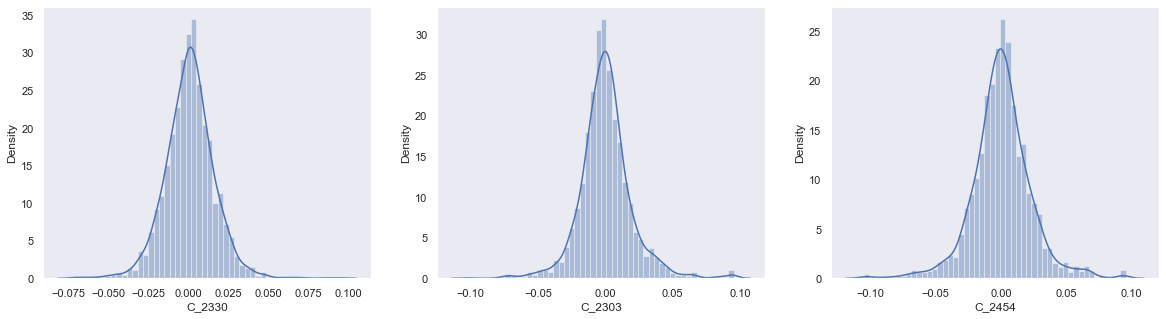

In [434]:
fig, axes = plt.subplots(1, len(ColName), figsize=(20, 5))
for i in range(len(ColName)):
    sns.distplot(df[ColName[i]], ax=axes[i])

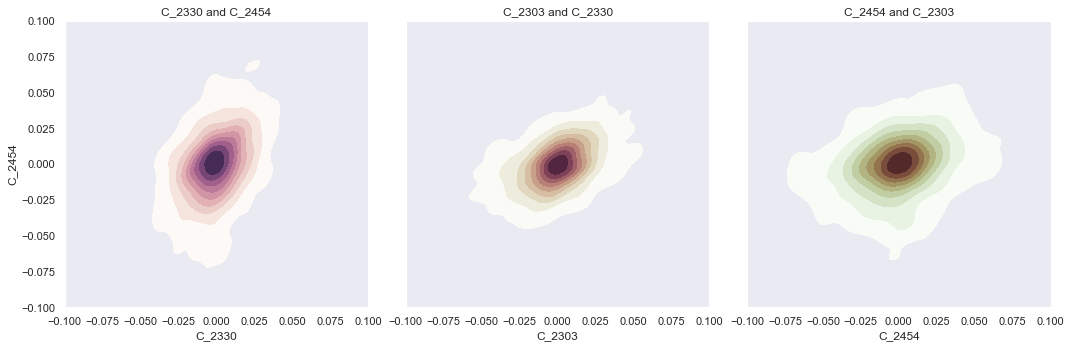

In [371]:
sns.set(style="dark")
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)
    sns.kdeplot(df[ColName[round(3*s)]], df[ColName[round(3*s-1)]], cmap=cmap, shade=True, cut=5, ax=ax).set_title('%s and %s' %(ColName[round(3*s)], ColName[round(3*s-1)]))
    ax.set(xlim=(-0.1, 0.1), ylim=(-0.1, 0.1))
f.tight_layout()

In [ ]:
def kendal_tau():
    
    return

In [ ]:
def pair_selection():
    
    return

In [ ]:
def copulas_theta():
    return 

# Analysis

藉由copula找出joint distribution，作為強弱勢配對交易的依據。
可利用檢定推斷出何種copulas比較適合
idea:
> 1. P(U1 <= u1|U2 = u2) <= cd and P(U2 <= u2|U1 = u1) >= cu 代表stock2被高估 stock1被低估
> long stock1 short stock2 其一或二機率碰到0.5時出場
> 2. 利用DL找出適當的copula
> 3. Markov transition matrix

In [241]:
Copula = ['clayton, frank, gumble']
cu, cd = [0.9, 0.1]
